## Estadística Aplicada

Actividad 11

Karla Mariana Ley Acero 2076201

Grupo 42

In [221]:
### Librerías

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [222]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [223]:
### Librerías especializadas

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

### Importar el modelo ARIMA

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

### Definir el tamaño de la gráfica

plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.labelsize'] = 12

Se va a realizar el pronóstico del indicador Mensual del Consumo Privado IMCP, que es 
un índice que mide el comportamiento del gasto de los hogares en México 
(consumidores). El dato disponible más reciente es julio de 2023, por tanto, se debe 
realizar el pronóstico para agosto de 2023. 

-  Descargar la base de datos con base en el video adjunto, se debe elegir un 
periodo y en la notebook se debe justificar el periodo elegido

**Justificación**

La elección del período de 1993 a julio de 2023 se basa en la idea de que disponer de una serie temporal más larga proporciona una base de datos más sólida y rica para realizar predicciones.

In [224]:
# Cargar la base de datos

df_IMCMI_SA = pd.read_excel("C:/Users/Usuario/Downloads/IMCMI_SA.xlsx")

In [225]:
#Visualizar la base de datos 
df_IMCMI_SA.head()

,Periodos,IMCMI_SA
0,1993/01,52.535712
1,1993/02,53.260021
2,1993/03,53.921865
3,1993/04,53.102741
4,1993/05,54.042567


Hay dos opciones que pueden utilizarse 

* ARIMA = Serie no tiene componente estacional
* SARIMA = Serie tiene componente estacional 

En este caso el IMCMI es desestacionalizado (sin efecto estacional), así fue bajada la base de datos. 

2. Verificar tipo de variables y no existencia de missing values

In [226]:
df_IMCMI_SA.dtypes

Periodos     object
IMCMI_SA    float64
dtype: object

In [227]:
## MISSING VALUES

## corroborar que esta variable no tenga missing values

df_IMCMI_SA['IMCMI_SA'].isnull().sum()

0

Modificaciones al dataframe

In [228]:
### PASOS A SEGUIR

## 1. Formato fecha (meses)
df_IMCMI_SA['Periodos'] = pd.to_datetime(df_IMCMI_SA['Periodos'], format='%Y/%m')

In [229]:
df_IMCMI_SA.head()

,Periodos,IMCMI_SA
0,1993-01-01,52.535712
1,1993-02-01,53.260021
2,1993-03-01,53.921865
3,1993-04-01,53.102741
4,1993-05-01,54.042567


In [230]:
## 2. Fecha sea el index
df_IMCMI_SA = df_IMCMI_SA.set_index('Periodos')

In [231]:
df_IMCMI_SA

,IMCMI_SA
Periodos,
1993-01-01,52.535712
1993-02-01,53.260021
1993-03-01,53.921865
1993-04-01,53.102741
1993-05-01,54.042567
...,...
2023-03-01,106.762443
2023-04-01,107.928291
2023-05-01,107.775653


In [232]:
# Asignar una frecuencia

df_IMCMI_SA.asfreq('MS')

,IMCMI_SA
Periodos,
1993-01-01,52.535712
1993-02-01,53.260021
1993-03-01,53.921865
1993-04-01,53.102741
1993-05-01,54.042567
...,...
2023-03-01,106.762443
2023-04-01,107.928291
2023-05-01,107.775653


In [233]:
df_IMCMI_SA.index

DatetimeIndex(['1993-01-01', '1993-02-01', '1993-03-01', '1993-04-01',
               '1993-05-01', '1993-06-01', '1993-07-01', '1993-08-01',
               '1993-09-01', '1993-10-01',
               ...
               '2022-10-01', '2022-11-01', '2022-12-01', '2023-01-01',
               '2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01',
               '2023-06-01', '2023-07-01'],
              dtype='datetime64[ns]', name='Periodos', length=367, freq=None)

3. Gráfico de la serie (títulos, nombre a ejes etc)


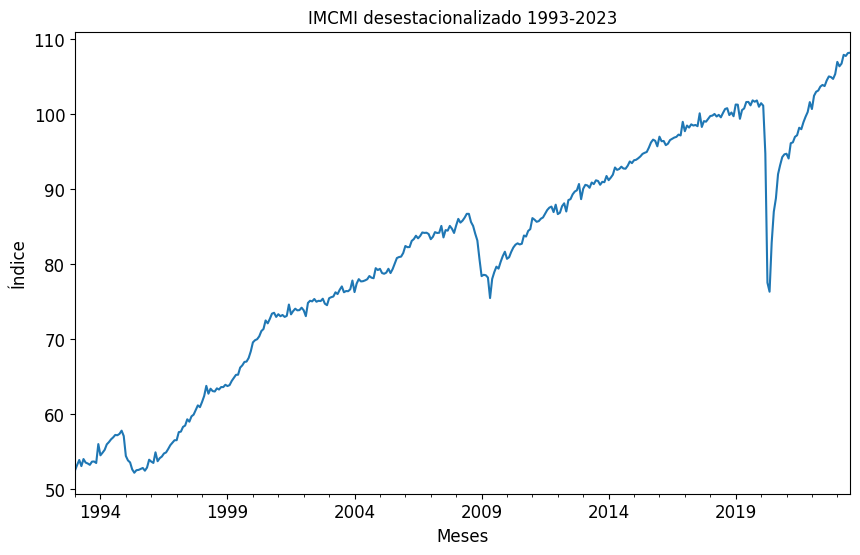

In [234]:
df_IMCMI_SA['IMCMI_SA'].plot()
plt.title('IMCMI desestacionalizado 1993-2023')
plt.ylabel('Índice')
plt.xlabel('Meses')
plt.show()

IGAE se comporta como una caminata aleatoria con deriva, se sospecha entonces que es un proceso **no estacionario**

4. Realiza un pronóstico del índice:

    **a)** Realiza una prueba de raíz unitaria a la serie original

Prueba de dickey-fuller aumentada

    Ho: Serie No estacionaria
    Ha: Serie estacionaria

**Regla de decisión** 

pvalue< alpha Rechazamos Ho

In [235]:
prueba_DFA = adfuller(df_IMCMI_SA['IMCMI_SA'])
pvalue = prueba_DFA[1]
pvalue.round(2)

0.8

El p value es 0.8. No se rechaza Ho. 

El df_IMCMI_SA ('IMCMI_SA') es una serie ***No Estacionaria***

**b)** En caso de que no sea estacionaria aplica primeras diferencias, y realiza 
la prueba de raíz unitaria para verificar que la serie sea estacionaria

$$ \Delta_t = Y_t - Y_{t-1} $$


In [236]:
df_IMCMI_SA['IMCMI_SA diff'] = df_IMCMI_SA['IMCMI_SA'].diff()

In [237]:
df_IMCMI_SA

,IMCMI_SA,IMCMI_SA diff
Periodos,,
1993-01-01,52.535712,NaN
1993-02-01,53.260021,0.724309
1993-03-01,53.921865,0.661844
1993-04-01,53.102741,-0.819123
1993-05-01,54.042567,0.939826
...,...,...
2023-03-01,106.762443,0.361856
2023-04-01,107.928291,1.165848
2023-05-01,107.775653,-0.152638


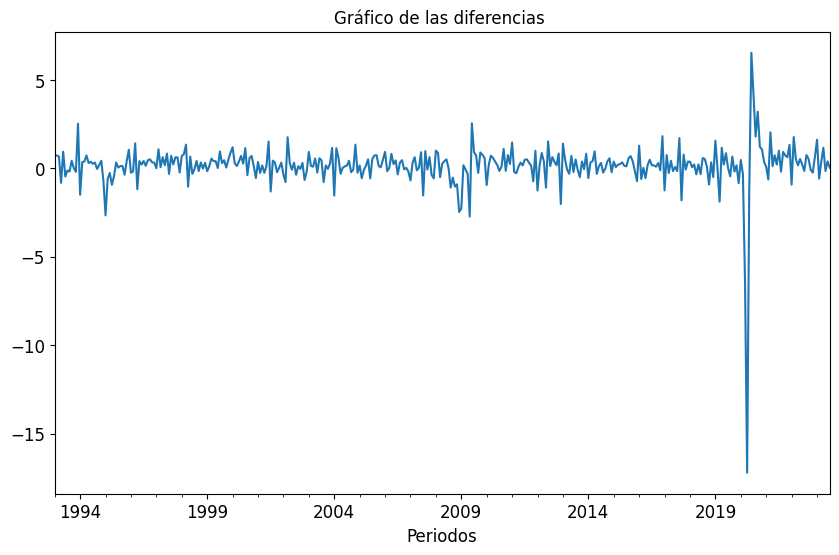

In [277]:
## Graficar

plt.title('Gráfico de las diferencias')
df_IMCMI_SA['IMCMI_SA diff'].plot();

De la gráfica se aprecia que se tiene un problema de varianza

In [239]:
## Prueba de dickey-fuller aumentada para las primeras diferencias 

## Hay que indicar que ignore el missing value = .dropna

prueba_DFA1 = adfuller(df_IMCMI_SA['IMCMI_SA diff'].dropna())
pvalue1 = prueba_DFA1[1]
pvalue1.round(2)

0.0

El p-value = 0.0 rechazamos Ho, las primeras diferencias del df_IMCMI_SA('IMCMI_SA') son una serie estacionaria 

* IMCMI Integrada I(1) = ARIMA (p.1,q)
* Primeras diferencias de IMCMI I(0) = ARIMA (p,0,q)

**c)** Si la serie no es estacionaria repite el paso b hasta que la serie sea estacionaria.

Ya se confirmó que si es estacionaria, por lo que ese paso se omite

**d)** Realiza las graficas de autocorrelación de la serie estacionaria para verificar si la serie tiene o no un componente estacional


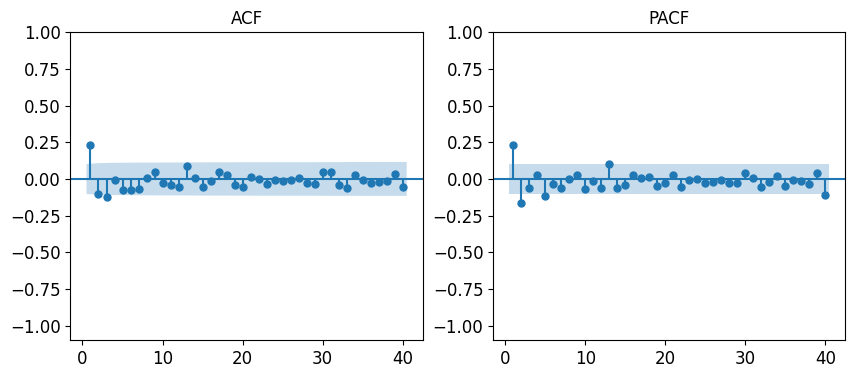

In [281]:
# Graficas de autocorrelacion
ig,ax=plt.subplots(1,2,figsize=(10,4))
# 1
plot_acf(df_IMCMI_SA['IMCMI_SA diff'].dropna(),zero=False,lags=40,ax=ax[0],title='ACF')
ax[0].set_ylim(-1.1)
# 2
plot_pacf(df_IMCMI_SA['IMCMI_SA diff'].dropna(),zero=False,lags=40,ax=ax[1],title='PACF')
ax[1].set_ylim(-1.1)
plt.show()

Como se puede apreciar en la gráfica no tiene un componente estacional

**e)** Utiliza auto_arima para encontrar el orden del modelo arima, dando el 
parámetro information_criterion, prueba y muestra el resultado, con aic, 
bic, hqic, oob.

In [241]:
pip install pmdarima


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [242]:
## Importamos pmdarima
import pmdarima as pm

In [243]:
# Serie de tiempo df_IMCMI_SA
serie_temporal = df_IMCMI_SA['IMCMI_SA']

# Lista de criterios de información a probar
criterios = ['aic', 'bic', 'hqic', 'oob']

# Recorre los criterios y muestra los resultados
for criterio in criterios:
    modelo = pm.auto_arima(serie_temporal, information_criterion=criterio)
    print(f"Resultado para {criterio}:")
    print(modelo.summary())

Resultado para aic:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  367
Model:               SARIMAX(2, 1, 1)   Log Likelihood                -590.782
Date:                Mon, 30 Oct 2023   AIC                           1191.564
Time:                        18:57:40   BIC                           1211.077
Sample:                    01-01-1993   HQIC                          1199.318
                         - 07-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0486      0.032      1.509      0.131      -0.014       0.112
ar.L1          0.9704      0.121      8.040      0.000       0.734       1.207
ar.L2         -0.2917      0.041

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\pmdarima\arima\_validation.py:35: UserWarning: information_criterion cannot be 'oob' with out_of_sample_size = 0. Falling back to information criterion = aic.
  warnings.warn('information_criterion cannot be \'oob\' with '


Resultado para oob:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  367
Model:               SARIMAX(2, 1, 1)   Log Likelihood                -590.782
Date:                Mon, 30 Oct 2023   AIC                           1191.564
Time:                        18:57:52   BIC                           1211.077
Sample:                    01-01-1993   HQIC                          1199.318
                         - 07-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0486      0.032      1.509      0.131      -0.014       0.112
ar.L1          0.9704      0.121      8.040      0.000       0.734       1.207
ar.L2         -0.2917      0.041

In [244]:
## Estimar modelo ARIMA para el IMCMI con (2,1,1)

arima_model1 = ARIMA(df_IMCMI_SA['IMCMI_SA'], order=(2,1,1))
resultados = arima_model1.fit()
print(resultados.summary())

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               IMCMI_SA   No. Observations:                  367
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -593.751
Date:                Mon, 30 Oct 2023   AIC                           1195.502
Time:                        18:57:53   BIC                           1211.113
Sample:                    01-01-1993   HQIC                          1201.705
                         - 07-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5707      0.301      1.894      0.058      -0.020       1.161
ar.L2         -0.2248      0.069     -3.268      0.001      -0.360      -0.090
ma.L1         -0.2963      0.309     -0.957      0.3

El orden de modelo ARIMA que se sugiere con auto_arima es (2,1,1) 

Se va a pronosticar este modelo arima para poder compararlo después

In [245]:
## Pronosticar la serie original 
df_IMCMI_SA['modelo_arima1'] =  resultados.predict()
df_IMCMI_SA['modelo_arima1'][0] = df_IMCMI_SA['IMCMI_SA'][0]

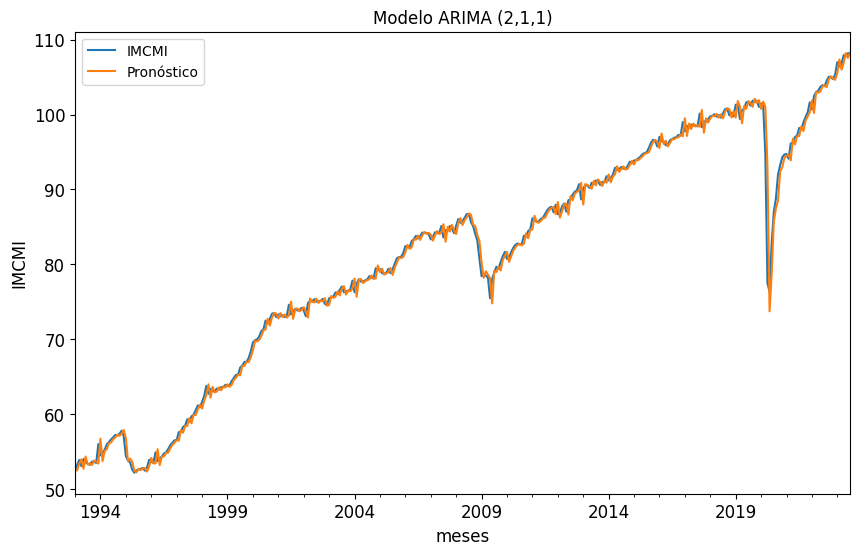

In [270]:
## Graficar tanto la serie origina como la del pronóstico
df_IMCMI_SA['IMCMI_SA'].plot(label='IMCMI')
df_IMCMI_SA['modelo_arima1'].plot(label='Pronóstico')
plt.title('Modelo ARIMA (2,1,1)')
plt.xlabel('meses')
plt.ylabel('IMCMI')
plt.legend();

f) Utilizar el método del if con AR y MA para ver que modelos sugieren el 
BIC y el AIC

In [247]:
## Lista vacia
ic = {}

for ar in range(7):
    for ma in range(7):
        print(f"AR:{ar}, MA:{ma}") ## nos mostrara que modelo esta estimando
        modelo = ARIMA(df_IMCMI_SA['IMCMI_SA diff'].dropna(), order= (ar,0,ma)) 
        resultado = modelo.fit() ## que estime el modelo)
        ic[(ar,ma)] = [resultado.aic, resultado.bic] # nos guarde de acuerdo a los valores de ar y ma los valore resultado.aic, resultado.bic criterio bayesiano, creia un dataframe a lo largo
ic= pd.DataFrame(ic, index = ['AIC', 'BIC']).T
ic.index = ic.index.set_names(['AR', 'MA'])

AR:0, MA:0


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


AR:0, MA:1
AR:0, MA:2


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\P

AR:0, MA:3
AR:0, MA:4


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\P

AR:0, MA:5


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


AR:0, MA:6


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


AR:1, MA:0
AR:1, MA:1


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\P

AR:1, MA:2


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


AR:1, MA:3


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


AR:1, MA:4


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


AR:1, MA:5


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Usuario\AppData\Loca

AR:1, MA:6


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Loca

AR:2, MA:0
AR:2, MA:1
AR:2, MA:2


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


AR:2, MA:3


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


AR:2, MA:4


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Usuario\AppData\Loca

AR:2, MA:5


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


AR:2, MA:6


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


AR:3, MA:0
AR:3, MA:1


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


AR:3, MA:2


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\

AR:3, MA:3


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Usuario\AppData\Loca

AR:3, MA:4


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


AR:3, MA:5


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


AR:3, MA:6
AR:4, MA:0
AR:4, MA:1


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\P

AR:4, MA:2


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\

AR:4, MA:3


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


AR:4, MA:4


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Loca

AR:4, MA:5


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Loca

AR:4, MA:6


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


AR:5, MA:0
AR:5, MA:1


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


AR:5, MA:2


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\

AR:5, MA:3


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


AR:5, MA:4


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Loca

AR:5, MA:5


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Loca

AR:5, MA:6


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


AR:6, MA:0
AR:6, MA:1


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Usuario\AppData\Loca

AR:6, MA:2


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Loca

AR:6, MA:3


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


AR:6, MA:4


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Loca

AR:6, MA:5


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


AR:6, MA:6


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [248]:
ic.sort_values('AIC')

AIC          BIC
AR MA                          
5  3   1183.425627  1222.451960
3  4   1185.729317  1220.853017
1  4   1186.773299  1214.091732
3  5   1187.410242  1226.436575
2  4   1187.501346  1218.722412
3  3   1187.721713  1218.942779
4  4   1188.277483  1227.303816
1  5   1188.285176  1219.506243
   2   1188.344471  1207.857638
5  6   1188.499654  1239.233888
6  1   1189.134972  1224.258672
1  6   1189.238852  1224.362552
0  3   1189.273431  1208.786598
4  3   1189.305256  1224.428956
   2   1189.381034  1220.602101
2  5   1189.485356  1224.609056
   3   1189.883184  1217.201618
   6   1190.144811  1229.171144
5  2   1190.555053  1225.678753
3  6   1190.559207  1233.488173
6  3   1190.748802  1233.677768
0  5   1190.815748  1218.134181
6  2   1191.023504  1230.049837
5  0   1191.153177  1218.471610
1  3   1191.218667  1214.634467
0  4   1191.266599  1214.682399
5  5   1191.414987  1238.246587
4  5   1191.499375  1234.428342
2  1   1191.563949  1211.077116
6  5   1191.657521  1242.391754
2  0   1191.833637  1207.444171
5  1   1191.884907  1223.105974
3  0   1192.413528  1211.926695
4  6   1192.448046  1239.279646
0  6   1192.536889  1223.757955
3  1   1192.548298  1215.964098
6  0   1192.698723  1223.919790
   4   1192.961975  1239.793575
   6   1193.026259  1247.663126
5  4   1193.038651  1235.967618
3  2   1193.939218  1221.257651
4  0   1194.088220  1217.504020
2  2   1194.109145  1217.524945
4  1   1194.369409  1221.687842
0  1   1194.679825  1206.387725
   2   1196.293447  1211.903980
1  1   1196.502682  1212.113216
   0   1199.982882  1211.690782
0  0   1218.589008  1226.394275

Las primeras diferencias del IMCMI son un ARMA(5,3)
* Primeras diferencias ARIMA(5,0,3)
* IMCMI(5,1,3)

Se va a estimar el modelo IMCMI(5,1,3)

In [249]:
## Estimar modelo ARIMA para el IMCMI

arima_model = ARIMA(df_IMCMI_SA['IMCMI_SA'], order=(5,1,3))
results = arima_model.fit()
print(results.summary())

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               IMCMI_SA   No. Observations:                  367
Model:                 ARIMA(5, 1, 3)   Log Likelihood                -591.107
Date:                Mon, 30 Oct 2023   AIC                           1200.213
Time:                        18:58:46   BIC                           1235.337
Sample:                    01-01-1993   HQIC                          1214.171
                         - 07-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5954      0.815      0.730      0.465      -1.003       2.193
ar.L2         -0.1884      0.786     -0.240      0.810      -1.728       1.351
ar.L3         -0.1991      0.605     -0.329      0.7

In [250]:
## Pronosticar la serie original 
df_IMCMI_SA['modelo_arima'] =  results.predict()
df_IMCMI_SA['modelo_arima'][0] = df_IMCMI_SA['IMCMI_SA'][0]

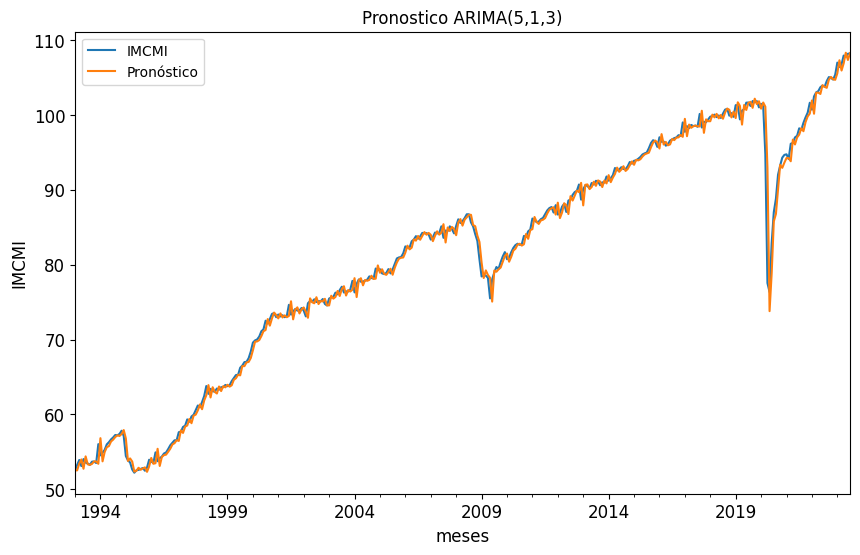

In [269]:
df_IMCMI_SA['IMCMI_SA'].plot(label='IMCMI')
df_IMCMI_SA['modelo_arima'].plot(label='Pronóstico')
plt.title('Pronostico ARIMA(5,1,3)')
plt.xlabel('meses')
plt.ylabel('IMCMI')
plt.legend();

In [252]:
## Ver los valores que predicen los 2 modelos que se estimaron
df_IMCMI_SA

,IMCMI_SA,IMCMI_SA diff,modelo_arima1,modelo_arima
Periodos,,,,
1993-01-01,52.535712,NaN,52.535712,52.535712
1993-02-01,53.260021,0.724309,52.535733,52.535733
1993-03-01,53.921865,0.661844,53.437063,53.437139
1993-04-01,53.102741,-0.819123,53.996871,53.996406
1993-05-01,54.042567,0.939826,52.750776,52.748186
...,...,...,...,...
2023-03-01,106.762443,0.361856,105.982264,105.928641
2023-04-01,107.928291,1.165848,106.869608,106.889385
2023-05-01,107.775653,-0.152638,108.198658,108.305415


g) Con los dos incisos anteriores elegir el orden ARIMA a estimar

Para seleccionar el orden adecuado del modelo ARIMA, primero realizamos la estimación de dos modelos distintos y visualizamos las series de pronóstico resultantes. Luego, efectuamos predicciones para el mes de agosto y observamos que en ambos modelos, el valor pronosticado disminuye. Sin embargo, al investigar en Internet, se encontró información que sugiere un ligero aumento en el Indicador Oportuno del Consumo Privado el cual es un indicador que da una referencia al próximo valor del IMCMI. En base a esta información, a pesar de que los dos modelos son muy similares y plausibles, decidí optar por aquel en el que el valor de agosto aumenta

En las siguientes dos líneas de código se encuentran las estimaciones del mes de agosto con los modelos de ARIMA estimados

In [253]:
resultados.predict(start='2023-08-01', end='2023-10-01')

2023-08-01    108.154916
2023-09-01    108.114552
2023-10-01    108.103761
Freq: MS, Name: predicted_mean, dtype: float64

In [254]:
results.predict(start='2023-08-01', end='2023-10-01')

2023-08-01    108.202059
2023-09-01    108.058802
2023-10-01    108.036695
Freq: MS, Name: predicted_mean, dtype: float64

Ahora se intentará probar con el segundo modelo ARIMA que propone la tabla el cual es:

**IMCMI (3,1,4)**

In [258]:
## Estimar modelo ARIMA para el IMCMI

arima_model2 = ARIMA(df_IMCMI_SA['IMCMI_SA'], order=(3,1,4))
results2 = arima_model2.fit()
print(results2.summary())

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:               IMCMI_SA   No. Observations:                  367
Model:                 ARIMA(3, 1, 4)   Log Likelihood                -587.502
Date:                Mon, 30 Oct 2023   AIC                           1191.003
Time:                        19:16:37   BIC                           1222.224
Sample:                    01-01-1993   HQIC                          1203.410
                         - 07-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0454      0.182     -5.731      0.000      -1.403      -0.688
ar.L2          0.3849      0.333      1.157      0.247      -0.267       1.037
ar.L3          0.7196      0.196      3.679      0.0

Después de una vez se va a checar si los valores aumentan o disminuyen en el mes de agosto.

In [259]:
results2.predict(start='2023-08-01', end='2023-10-01')

2023-08-01    108.453524
2023-09-01    108.128586
2023-10-01    108.095522
Freq: MS, Name: predicted_mean, dtype: float64

Con este modelo hay un pequeño aumento así que es el que usaremos

(Hasta aca ya se hizo el inciso H e i)

In [260]:
## Pronosticar la serie original 
df_IMCMI_SA['modelo_arima2'] =  results2.predict()
df_IMCMI_SA['modelo_arima2'][0] = df_IMCMI_SA['IMCMI_SA'][0]

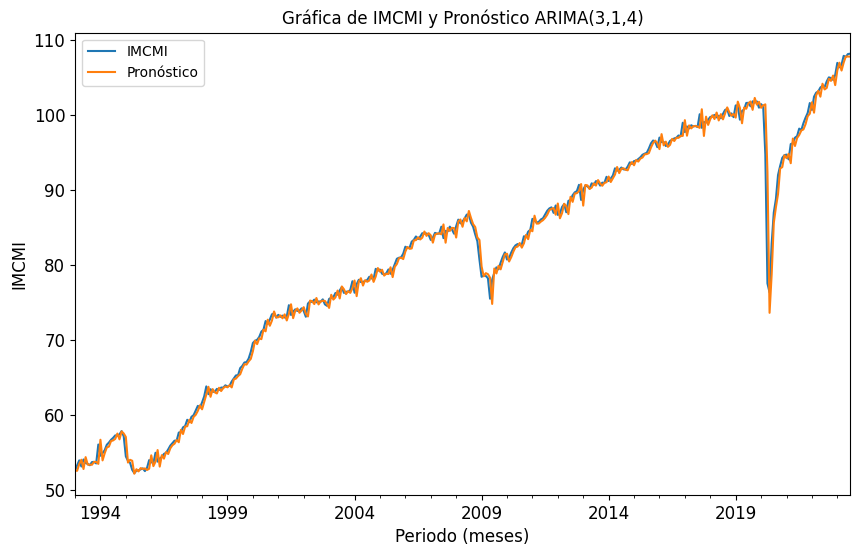

In [264]:
# Graficar serie original y la del pronostico 

plt.title('Gráfica de IMCMI y Pronóstico ARIMA(3,1,4)')
df_IMCMI_SA['IMCMI_SA'].plot(label='IMCMI')
df_IMCMI_SA['modelo_arima2'].plot(label='Pronóstico')
plt.xlabel('Periodo (meses)')
plt.ylabel('IMCMI')
plt.legend();

**j)** Mostrar en un print el pronóstico para agosto de 2023 con sus intervalos de confianza al 95%

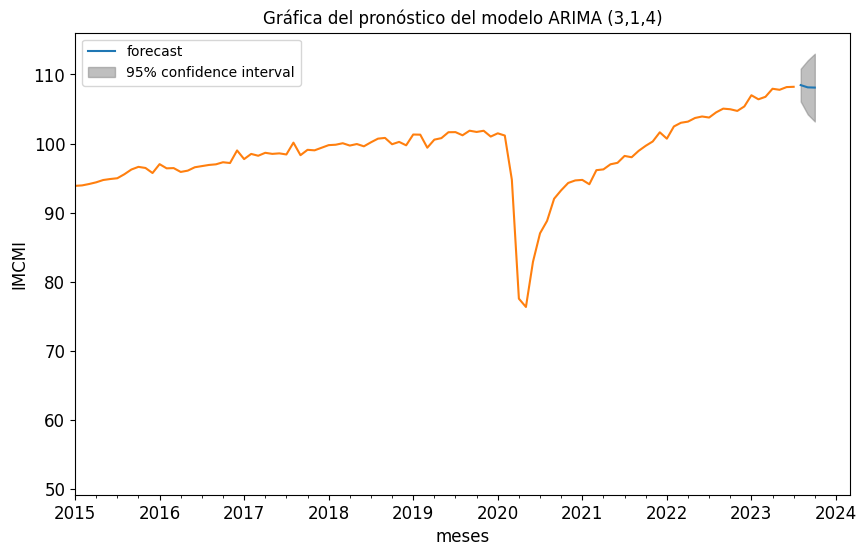

In [268]:
## gráfica del pronóstico
plot_predict(results2, start='2023-08-01', end='2023-10-01')
plt.title('Gráfica del pronóstico del modelo ARIMA (3,1,4)')
df_IMCMI_SA['IMCMI_SA'].plot()
plt.xlim('2015-01-01', '2024-03-01')
plt.xlabel('meses')
plt.ylabel('IMCMI')
plt.show()

Pronóstico con intervalos

In [271]:
forecast = results2.get_forecast(steps=4)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

In [272]:
inicio = '2023-08-01'
fin = '2023-11-01'

In [273]:
pronostico_valor = forecast_mean[inicio:fin]
pronostico_intervalos = forecast_ci.loc[inicio:fin]

In [274]:
pro_IMCMI = pd. DataFrame({
    'pronóstico': pronostico_valor,
    'limite inferior': pronostico_intervalos.iloc[:,0],
    'limite superior': pronostico_intervalos.iloc[:,1]
})

In [275]:
pro_IMCMI

,pronóstico,limite inferior,limite superior
2023-08-01,108.453524,106.077752,110.829295
2023-09-01,108.128586,104.219025,112.038147
2023-10-01,108.095522,103.194767,112.996277
2023-11-01,108.056961,102.467374,113.646548


In [278]:
print(f'Para agosto de 2023 pronosticamos un IMCMI de: {pro_IMCMI.iloc[0,0].round(2)}\npero puede estar entre {pro_IMCMI.iloc[0,1].round(2)} y {pro_IMCMI.iloc[0,2].round(2)}')

Para agosto de 2023 pronosticamos un IMCMI de: 108.45
pero puede estar entre 106.08 y 110.83


### **CONCLUSIÓN**

Para seleccionar el modelo ARIMA adecuado, me basé en el Indicador Oportuno del Consumo Privado (IOCP), el cual proporciona estimaciones para los dos meses posteriores al último dato disponible del Indicador Mensual del Consumo Privado en el Mercado Interior (IMCPMI). Según los datos proporcionados por el Instituto Nacional de Estadística y Geografía (Inegi), se prevé una leve alza en el mes de agosto.

A pesar de que los modelos ARIMA (5,1,3) y (2,1,1) demuestran ser buenos estimadores en general, al proyectar el valor futuro para agosto, muestran una ligera disminución. Por esta razón, se tomó la decisión de seleccionar el segundo mejor modelo, ordenando los valores del criterio de información de Akaike (AIC) en orden ascendente. Este modelo resultó ser el ARIMA (3,1,4).

Utilizando el ARIMA (3,1,4), se realizó una predicción para el mes de agosto, que estimó un valor de 108.4535, con un intervalo de confianza del 95% entre 106.08 y 110.83
